# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=2000)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=2000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

769


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
from api_keys import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
city = cities[3]
response = requests.get(query_url + city).json()

In [4]:
print(f'Beginning Data Retrieval')
print(f'------------------------')
weather_table = pd.DataFrame([])
city_number = 1
total_cities = len(cities)
for i, city in enumerate(cities):
    response = requests.get(query_url + city).json()
    print(f'Getting data of city {city_number} of {total_cities}: {city}')
    city_number += 1
    #Utilized JSON_Normalize to flatten response and draw out columns needed for each city. 
    try:
        weather = pd.json_normalize(response)[['name','dt','coord.lon','coord.lat', 'main.temp_max','main.humidity','wind.speed','clouds.all','sys.country']]
        weather.rename(columns={'name':'City Name','dt':'Date','coord.lon':'Long','coord.lat':'Lat','main.temp_max':'Temp','sys.country':'Country','main.humidity':'Humid','wind.speed':'Wind','clouds.all':'clouds'}, inplace=True)
        weather_table = weather_table.append(weather,ignore_index=True)
    except:
        print(f'{city} does not have complete data, skipping')
        pass
print(f'-----------------------')
print(f'Data Retrieval Complete')
print(f'-----------------------')

Beginning Data Retrieval
------------------------
Getting data of city 1 of 769: alamosa
Getting data of city 2 of 769: redhakhol
redhakhol does not have complete data, skipping
Getting data of city 3 of 769: carutapera
Getting data of city 4 of 769: rincon
Getting data of city 5 of 769: qaanaaq
Getting data of city 6 of 769: bluff
Getting data of city 7 of 769: yellowknife
Getting data of city 8 of 769: beringovskiy
Getting data of city 9 of 769: oxford
Getting data of city 10 of 769: saldanha
Getting data of city 11 of 769: mataura
Getting data of city 12 of 769: elat
Getting data of city 13 of 769: mrirt
mrirt does not have complete data, skipping
Getting data of city 14 of 769: dikson
Getting data of city 15 of 769: tomatlan
Getting data of city 16 of 769: san patricio
Getting data of city 17 of 769: casper
Getting data of city 18 of 769: ushuaia
Getting data of city 19 of 769: trairi
Getting data of city 20 of 769: acapulco
Getting data of city 21 of 769: mokhotlong
Getting data o

Getting data of city 181 of 769: orda
Getting data of city 182 of 769: pandan
Getting data of city 183 of 769: viedma
Getting data of city 184 of 769: sakakah
Getting data of city 185 of 769: khatanga
Getting data of city 186 of 769: bara
Getting data of city 187 of 769: mimongo
Getting data of city 188 of 769: tucuman
Getting data of city 189 of 769: srednekolymsk
Getting data of city 190 of 769: sao filipe
Getting data of city 191 of 769: sibu
Getting data of city 192 of 769: te anau
Getting data of city 193 of 769: tambun
Getting data of city 194 of 769: saint anthony
Getting data of city 195 of 769: chimore
Getting data of city 196 of 769: bandarbeyla
Getting data of city 197 of 769: nishihara
Getting data of city 198 of 769: pestovo
Getting data of city 199 of 769: atar
Getting data of city 200 of 769: carbonear
Getting data of city 201 of 769: saint-philippe
Getting data of city 202 of 769: lavrentiya
Getting data of city 203 of 769: nouadhibou
Getting data of city 204 of 769: gr

Getting data of city 356 of 769: shihezi
Getting data of city 357 of 769: madera
Getting data of city 358 of 769: smithers
Getting data of city 359 of 769: mackay
Getting data of city 360 of 769: broken hill
Getting data of city 361 of 769: safaqis
safaqis does not have complete data, skipping
Getting data of city 362 of 769: nicoya
Getting data of city 363 of 769: tiznit
Getting data of city 364 of 769: newport
Getting data of city 365 of 769: plettenberg bay
Getting data of city 366 of 769: ust-karsk
Getting data of city 367 of 769: zhaozhou
Getting data of city 368 of 769: norman wells
Getting data of city 369 of 769: kerchevskiy
Getting data of city 370 of 769: serenje
Getting data of city 371 of 769: wilmington
Getting data of city 372 of 769: cherskiy
Getting data of city 373 of 769: bathsheba
Getting data of city 374 of 769: goderich
Getting data of city 375 of 769: sept-iles
Getting data of city 376 of 769: chaochou
chaochou does not have complete data, skipping
Getting data of

Getting data of city 535 of 769: lingao
Getting data of city 536 of 769: calvinia
Getting data of city 537 of 769: eratinon
eratinon does not have complete data, skipping
Getting data of city 538 of 769: pizarro
Getting data of city 539 of 769: tabou
Getting data of city 540 of 769: naantali
Getting data of city 541 of 769: umm durman
umm durman does not have complete data, skipping
Getting data of city 542 of 769: buraydah
Getting data of city 543 of 769: hirara
Getting data of city 544 of 769: bergen
Getting data of city 545 of 769: bundaberg
Getting data of city 546 of 769: calama
Getting data of city 547 of 769: lata
Getting data of city 548 of 769: muscle shoals
Getting data of city 549 of 769: ulladulla
Getting data of city 550 of 769: mandurah
Getting data of city 551 of 769: panguna
Getting data of city 552 of 769: paraiso
Getting data of city 553 of 769: el alto
Getting data of city 554 of 769: plastun
Getting data of city 555 of 769: tavda
Getting data of city 556 of 769: taz

Getting data of city 718 of 769: obidos
Getting data of city 719 of 769: hambantota
Getting data of city 720 of 769: ejby
Getting data of city 721 of 769: aykhal
Getting data of city 722 of 769: salinopolis
Getting data of city 723 of 769: rodrigues alves
Getting data of city 724 of 769: diego de almagro
Getting data of city 725 of 769: kiruna
Getting data of city 726 of 769: necochea
Getting data of city 727 of 769: himora
himora does not have complete data, skipping
Getting data of city 728 of 769: mananjary
Getting data of city 729 of 769: iskitim
Getting data of city 730 of 769: najran
Getting data of city 731 of 769: loreto
Getting data of city 732 of 769: liberal
Getting data of city 733 of 769: zabid
Getting data of city 734 of 769: avera
Getting data of city 735 of 769: wahiawa
Getting data of city 736 of 769: sampit
Getting data of city 737 of 769: omboue
Getting data of city 738 of 769: shimoda
Getting data of city 739 of 769: nyurba
Getting data of city 740 of 769: gladstone

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_table.to_csv(output_data_file, index = "City ID")
weather_table

,City Name,Date,Long,Lat,Temp,Humid,Wind,clouds,Country
0,Alamosa,1608350725,-105.87,37.47,15.80,92,3.36,90,US
1,Carutapera,1608350725,-46.02,-1.20,77.67,86,5.53,6,BR
2,Rincon,1608350724,-81.24,32.30,41.00,80,5.82,1,US
3,Qaanaaq,1608350725,-69.36,77.48,-1.91,84,0.96,14,GL
4,Bluff,1608350725,168.33,-46.60,64.99,93,1.99,100,NZ
...,...,...,...,...,...,...,...,...,...
705,Jalu,1608350801,21.55,29.03,52.66,82,7.70,56,LY
706,Verāval,1608350801,70.37,20.90,72.18,47,11.16,0,IN
707,Bairiki Village,1608350801,172.98,1.33,86.00,74,11.41,20,KI
708,Bentiu,1608350801,29.83,9.23,64.51,31,4.14,9,SS


In [6]:
#create easy access to information needed for plotting
temp = weather_table['Temp']
humid = weather_table['Humid']
clouds = weather_table['clouds']
wind = weather_table['Wind']
lat = weather_table['Lat']
lng = weather_table['Long']


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
weather_table.describe()

,Date,Long,Lat,Temp,Humid,Wind,clouds
count,7.100000e+02,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000
mean,1.608351e+09,15.519493,19.759211,49.464690,77.564789,7.442915,53.612676
std,7.060357e+01,89.615811,33.162386,30.884075,17.131060,5.398169,39.682458
min,1.608350e+09,-179.170000,-54.800000,-47.200000,13.000000,0.090000,0.000000
25%,1.608351e+09,-64.130000,-7.942500,28.400000,70.000000,3.360000,7.000000
50%,1.608351e+09,21.870000,22.390000,58.035000,81.000000,6.005000,62.000000
75%,1.608351e+09,89.832500,48.852500,74.927500,90.000000,10.290000,93.000000
max,1.608351e+09,179.320000,78.220000,103.690000,100.000000,41.000000,100.000000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

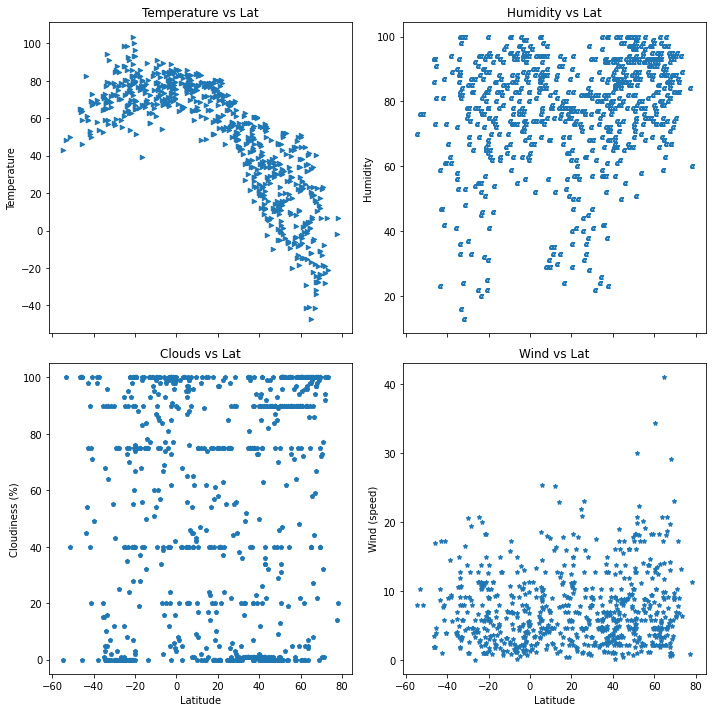

In [11]:

x = lat
z = np.sqrt(clouds**2 + x**2)

#Plot multiple plots on a 2x2 arrangement

fig, axs = plt.subplots(2, 2, sharex=True, sharey=False,figsize=(10,10))

# marker symbol
axs[0, 0].scatter(x, temp, s=20, marker=">")
axs[0, 0].set_title("Temperature vs Lat")
axs[0, 0].set_ylabel("Temperature")

# marker from TeX
axs[0, 1].scatter(x, humid, s=20, marker=r'$\alpha$')
axs[0, 1].set_title('Humidity vs Lat')
axs[0, 1].set_ylabel("Humidity")
# regular polygon marker
axs[1, 0].scatter(x, clouds, s=20, marker=(5, 0))
axs[1, 0].set_title("Clouds vs Lat")
axs[1, 0].set_ylabel("Cloudiness (%)")
axs[1, 0].set_xlabel("Latitude")
# regular star marker
axs[1, 1].scatter(x, wind, s=20, marker=(5, 1))
axs[1, 1].set_title("Wind vs Lat")
axs[1, 1].set_ylabel("Wind (speed)")
axs[1, 1].set_xlabel("Latitude")

plt.tight_layout()

The above code is plotting all four comparisons utilizing a common x-axis. It appears to show that cloudiness and wind speed all have similar ranges no matter the latitude, while temperature and humidity are more varied based on location around the world. 

## Linear Regression

In [12]:
#saving variables for use in following plots.
northern_weather = weather_table[weather_table['Lat'] >= 0]
southern_weather = weather_table[weather_table['Lat'] < 0]
n_temp = northern_weather['Temp']
n_humid = northern_weather['Humid']
n_clouds = northern_weather['clouds']
n_wind = northern_weather['Wind']
n_lat = northern_weather['Lat']
n_lng = northern_weather['Long']
s_temp = southern_weather['Temp']
s_humid = southern_weather['Humid']
s_clouds = southern_weather['clouds']
s_wind = southern_weather['Wind']
s_lat = southern_weather['Lat']
s_lng = southern_weather['Long']


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

the r-value is 0.7243666626012297


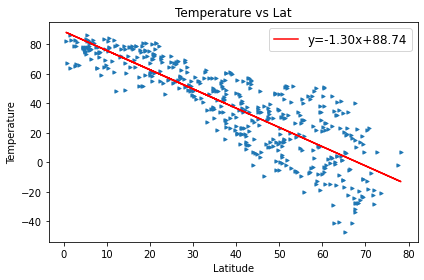

In [14]:
y=n_temp
x=n_lat
slope, intercept, r_value, p_value, std_err = linregress(x,y)
plt.scatter(x, y, s=10, marker=">")
line = slope*x+intercept
print(f'the r-value is {r_value**2}')
plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.title("Temperature vs Lat")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.legend(fontsize=12)
plt.tight_layout()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

the r-value is 0.15783628479256556


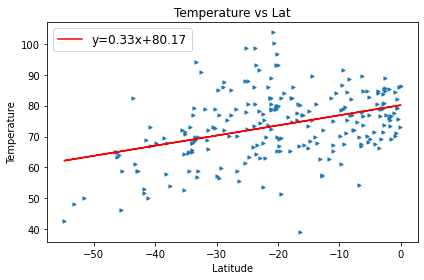

In [15]:
y=s_temp
x=s_lat
slope, intercept, r_value, p_value, std_err = linregress(x,y)
plt.scatter(x, y, s=10, marker=">")
line = slope*x+intercept
print(f'the r-value is {r_value**2}')
plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.title("Temperature vs Lat")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.legend(fontsize=12)
plt.tight_layout()

The two regressions above are demonstrating that as we get closer to the equator the temperature goes up. It is interesting that it looks like the temperature drops more quickly as we move towards the north pole due to the increased slope of the regression line.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the r-value is 0.09188397827697097


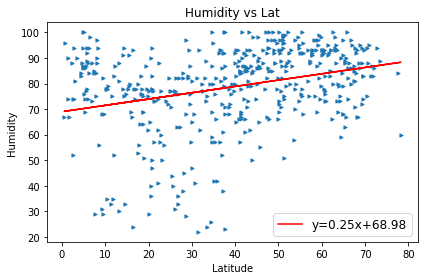

In [16]:
y=n_humid
x=n_lat
slope, intercept, r_value, p_value, std_err = linregress(x,y)
plt.scatter(x, y, s=10, marker=">")
line = slope*x+intercept
print(f'the r-value is {r_value**2}')
plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.title("Humidity vs Lat")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.legend(fontsize=12)
plt.tight_layout()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the r-value is 0.06691319764021346


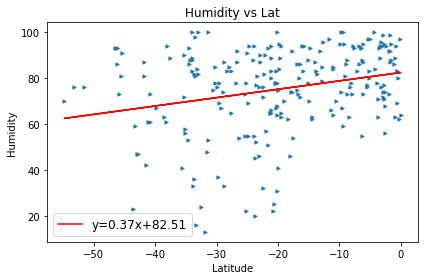

In [17]:
y=s_humid
x=s_lat
slope, intercept, r_value, p_value, std_err = linregress(x,y)
plt.scatter(x, y, s=10, marker=">")
line = slope*x+intercept
print(f'the r-value is {r_value**2}')
plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.title("Humidity vs Lat")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.legend(fontsize=12)
plt.tight_layout()

When looking at humidity, it looks like humidity increases slowly as we head from the south pole to the north pole as evidenced by both regression lines being at a positive slope. It's not an agressive increase but it does appear to generally have more humidity in the northern hempisphere than the southern hemisphere. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the r-value is 0.04988447186608543


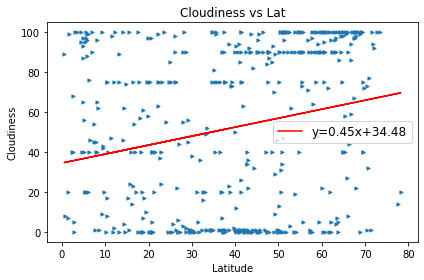

In [18]:
y=n_clouds
x=n_lat
slope, intercept, r_value, p_value, std_err = linregress(x,y)
plt.scatter(x, y, s=10, marker=">")
line = slope*x+intercept
print(f'the r-value is {r_value**2}')
plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.title("Cloudiness vs Lat")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.legend(fontsize=12)
plt.tight_layout()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the r-value is 0.05358628523544612


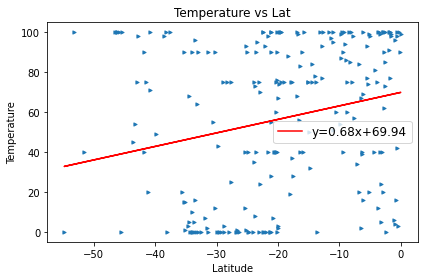

In [19]:
y=s_clouds
x=s_lat
slope, intercept, r_value, p_value, std_err = linregress(x,y)
plt.scatter(x, y, s=10, marker=">")
line = slope*x+intercept
print(f'the r-value is {r_value**2}')
plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.title("Temperature vs Lat")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.legend(fontsize=12)
plt.tight_layout()

Cloudiness Summary

When looking at cloudiness, it is very similar to humidity and generally shows an increase in cloud cover as we move from south to north. The difference here is the data is really spread out and therefore neither regression line is a very accurate one as evidenced by the extremely low R values. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the r-value is 0.0049672393923310045


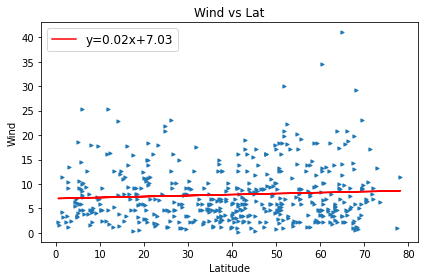

In [20]:
y=n_wind
x=n_lat
slope, intercept, r_value, p_value, std_err = linregress(x,y)
plt.scatter(x, y, s=10, marker=">")
line = slope*x+intercept
print(f'the r-value is {r_value**2}')
plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.title("Wind vs Lat")
plt.ylabel("Wind")
plt.xlabel("Latitude")
plt.legend(fontsize=12)
plt.tight_layout()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the r-value is 0.030452067054839136


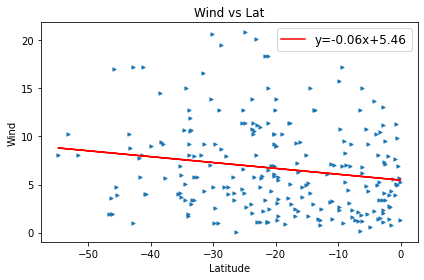

In [21]:
y=s_wind
x=s_lat
slope, intercept, r_value, p_value, std_err = linregress(x,y)
plt.scatter(x, y, s=10, marker=">")
line = slope*x+intercept
print(f'the r-value is {r_value**2}')
plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.title("Wind vs Lat")
plt.ylabel("Wind")
plt.xlabel("Latitude")
plt.legend(fontsize=12)
plt.tight_layout()

Wind Summary

In this comparison it is showing that the wind tends to be slightly higher at the poles than near the equator as evidenced by the regression formulas. 